In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
inp_ftrs = pd.read_pickle('../../../music_matrix/cfg01_m20/ftrs.pickle').drop(columns=['date']).astype(float)
inp_lbls = pd.read_pickle('../../../music_matrix/cfg01_m20/lbls.pickle')
full_array = np.hstack([inp_ftrs.to_numpy(), inp_lbls.to_numpy()])
corrcoefs = np.corrcoef(full_array.T)

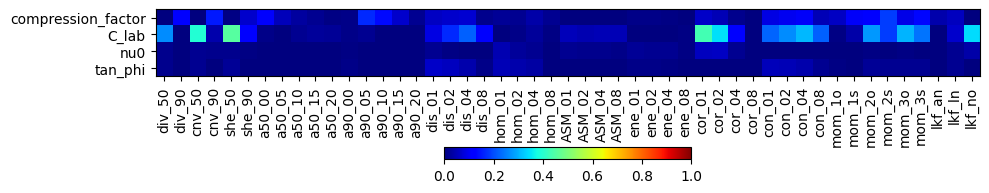

In [8]:
fig, axs = plt.subplots(1,1, figsize=(10, 5))
plt.imshow(corrcoefs[-4:, :-4]**2, cmap='jet', clim=[0,1])
plt.yticks(range(4), inp_lbls.columns)
plt.xticks(range(49), inp_ftrs.columns, rotation=90)
plt.colorbar(shrink=0.3, orientation='horizontal')
plt.tight_layout()
plt.savefig('../tuning_paper_figures/fig00_correlations.png', dpi=100, bbox_inches='tight', pad_inches=0.1)
plt.show()
